In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emnist/emnist-letters-mapping.txt
/kaggle/input/emnist/emnist-letters-test.csv
/kaggle/input/emnist/emnist-mnist-mapping.txt
/kaggle/input/emnist/emnist-digits-train.csv
/kaggle/input/emnist/emnist-bymerge-mapping.txt
/kaggle/input/emnist/emnist-balanced-train.csv
/kaggle/input/emnist/emnist-digits-test.csv
/kaggle/input/emnist/emnist-balanced-test.csv
/kaggle/input/emnist/emnist-mnist-test.csv
/kaggle/input/emnist/emnist-letters-train.csv
/kaggle/input/emnist/emnist-byclass-train.csv
/kaggle/input/emnist/emnist-bymerge-test.csv
/kaggle/input/emnist/emnist-balanced-mapping.txt
/kaggle/input/emnist/emnist-mnist-train.csv
/kaggle/input/emnist/emnist-digits-mapping.txt
/kaggle/input/emnist/emnist-bymerge-train.csv
/kaggle/input/emnist/emnist-byclass-test.csv
/kaggle/input/emnist/emnist-byclass-mapping.txt
/kaggle/input/emnist/emnist_source_files/emnist-digits-test-labels-idx1-ubyte
/kaggle/input/emnist/emnist_source_files/emnist-bymerge-train-labels-idx1-ubyte
/kaggle/input/

In [2]:
import pandas as pd
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt

2024-05-04 18:00:40.347205: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-04 18:00:40.347353: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-04 18:00:40.508504: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import pandas as pd

num_columns = 785

# Create column names
columns = ['label'] + list(range(1, num_columns))

# Read the training and testing datasets
ds_train = pd.read_csv("/kaggle/input/emnist/emnist-balanced-train.csv", header=None)
ds_test = pd.read_csv("/kaggle/input/emnist/emnist-balanced-test.csv", header=None)

# Assign column names to the DataFrames
ds_train.columns = columns
ds_test.columns = columns

# Reset index
ds_train = ds_train.reset_index(drop=True)
ds_test = ds_test.reset_index(drop=True)

# Extract features and labels
x_train = ds_train.drop(['label'], axis=1)
y_train = ds_train['label']
x_test = ds_test.drop(['label'], axis=1)
y_test = ds_test['label']

# Display the first few rows of the DataFrame
print(ds_train.head())
print(ds_test.head())

   label  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  \
0     45  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
1     36  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2     43  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
3     15  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
4      4  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   

   782  783  784  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0  

[5 rows x 785 columns]
   label  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  \
0     41  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
1     39  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2      9  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
3     26  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0 

In [4]:
alpha_num_to_char = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'a', 11: 'b', 12: 'c', 13: 'd', 14: 'e', 15: 'f', 16: 'g', 17: 'h', 18: 'i', 19: 'j',
    20: 'k', 21: 'l', 22: 'm', 23: 'n', 24: 'o', 25: 'p', 26: 'q', 27: 'r', 28: 's', 29: 't',
    30: 'u', 31: 'v', 32: 'w', 33: 'x', 34: 'y', 35: 'z',
    36: 'A', 37: 'B', 38: 'C', 39: 'D', 40: 'E', 41: 'F', 42: 'G', 43: 'H', 44: 'I', 45: 'J',
    46: 'K', 47: 'L', 48: 'M', 49: 'N', 50: 'O', 51: 'P', 52: 'Q', 53: 'R', 54: 'S', 55: 'T',
    56: 'U', 57: 'V', 58: 'W', 59: 'X', 60: 'Y', 61: 'Z'
}

In [5]:
def show_example(n) :
    label = alpha_num_to_char[ds_train.iloc[n,0]]  # the example's label
    plt.title(label)
    example = np.array(x_train.iloc[n]) # extract the 28 *28 array that contains the pixels
    example_image = example.reshape(28 , 28 ) # rearrange the array to be a 28 by 28 matrix ,that represents that actual image
    plt.imshow(example_image , cmap ='gray')
    plt.axis('off')
  
    plt.show()

In [6]:
def show_example_and_predicted_val(n,predicted_n) :

    true_val = alpha_num_to_char[ds_train.iloc[n,0]]  # the example's label
    predicted_val = alpha_num_to_char[predicted_n]  # the example's label
    
    plt.title("Actual val : "+ true_val+"\n Predicted :" + predicted_val)
    example = np.array(x_train.iloc[n]) # extract the 28 *28 array that contains the pixels
    example_image = example.reshape(28 , 28 ) # rearrange the array to be a 28 by 28 matrix ,that represents that actual image
    plt.imshow(example_image , cmap ='gray')
    plt.axis('off')
  
    plt.show()

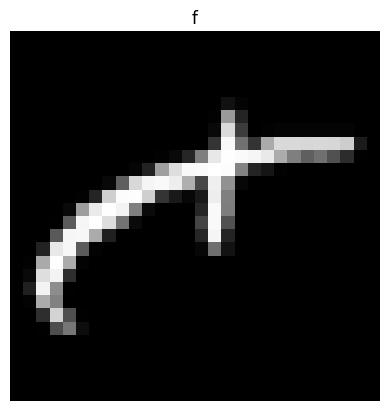

In [7]:
show_example(3)

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

class Reshaper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_reshaped = X.reshape(-1, 28, 28, 1)
        return X_reshaped

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: StandardScaler
    ('reshaper', Reshaper())  # Step 2: Custom Reshaper
])


# Fit and transform the training data

x_train_processed = pipeline.fit_transform(x_train)
y_train_processed = np.eye(62)[y_train.astype(int)]

x_test_processed = pipeline.transform(x_test)

y_test_processed = np.eye(62)[y_test.astype(int)]

In [9]:
print('input shape',x_train_processed.shape)
print('output shape',y_train.shape)
# y_train = np.eye(62)[y_train.astype(int)]
print('output shape',y_train_processed.shape)

input shape (112800, 28, 28, 1)
output shape (112800,)
output shape (112800, 62)


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout

#  multiple model architectures
models = []
input_shape=(28,28,1)
# Model 1
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(62, activation='softmax'))
models.append(model1)

# Model 2
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model2.add(Dropout(0.25)) 
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(62, activation='softmax'))
# Add layers for Model 2
models.append(model2)

# Model 3
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model3.add(Dropout(0.25)) 
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(62, activation='softmax'))
models.append(model3)

# Train each model
for i, model in enumerate(models):
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(x_train_processed, y_train_processed, epochs=5, batch_size=32)

# Evaluate each model
accuracies = []
for i, model in enumerate(models):
    loss, accuracy = model.evaluate(x_test_processed, y_test_processed)
    accuracies.append(accuracy)
    print(f"Model {i+1} Accuracy: {accuracy}")

# Select the best model based on accuracy
best_model_index = accuracies.index(max(accuracies))
best_model = models[best_model_index]
print(f"Best Model: Model {best_model_index+1}")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 53s 15ms/step - accuracy: 0.6616 - loss: 1.1855
Epoch 2/5
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 80s 14ms/step - accuracy: 0.8350 - loss: 0.5008
Epoch 3/5
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 80s 14ms/step - accuracy: 0.8542 - loss: 0.4232
Epoch 4/5
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 83s 14ms/step - accuracy: 0.8682 - loss: 0.3785
Epoch 5/5
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 82s 14ms/step - accuracy: 0.8767 - loss: 0.3420
Epoch 1/5
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 65s 18ms/step - accuracy: 0.5292 - loss: 1.6774
Epoch 2/5
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 64s 18ms/step - accuracy: 0.7446 - loss: 0.8072
Epoch 3/5
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 82s 18ms/step - accuracy: 0.7716 - loss: 0.7195
Epoch 4/5
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 81s 18ms/step - accuracy: 0.7852 - loss: 0.6635
Epoch 5/5
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 63s 18ms/step - accuracy: 0.7945 - loss: 0.6300
Epoch 1/5
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - accuracy: 0.5752 - loss: 1.4839
Epoch 2/5
3525/3525 ━

In [2]:
import numpy as np
import pandas as pd

# Function to load the model on your machine
def load_my_model(filepath):
    model = load_model("best_emnist_model.h5")
    model.predict(filepath)
    return model


In [3]:
image = "pic1.png"

In [10]:
!pip install tensorflow --user

  Using cached tensorflow-2.16.1-cp39-cp39-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.16.1-cp39-cp39-win_amd64.whl (376.9 MB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Using cached h5py-3.11.0-cp39-cp39-win_amd64.whl (3.0 MB)
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached grpcio-1.63.0-cp39-cp39-win_amd64.whl (3.9 MB)
  Using cached ml_dtypes-0.3.2-cp39-cp39-win_amd64.whl (127 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Usi

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached Markdown-3.6-py3-none-any.whl (105 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)


In [5]:
# from tensorflow.keras.models import load_model
# from PIL import Image
# import numpy as np
# import pandas as pd 
# # Load the best model
# best_model = load_model('best_emnist_model.h5')

# # Load the new image
# new_image = Image.open('pic2.png')

# # Preprocess the new image
# new_image = new_image.resize((28, 28))
# new_image = new_image.convert('L')
# new_image_array = np.array(new_image)
# new_image_array = new_image_array / 255.0

# # Make predictions
# predictions = best_model.predict(new_image_array.reshape((1, 28, 28, 1)))

# # Get the predicted digit (index with highest probability)
# predicted_digit = np.argmax(predictions)

# print("Predicted Digit:", predicted_digit)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted Digit: 36


In [8]:
alpha_num_to_char = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: 'a',
    11: 'b',
    12: 'c',
    13: 'd',
    14: 'e',
    15: 'f',
    16: 'g',
    17: 'h',
    18: 'i',
    19: 'j',
    20: 'k',
    21: 'l',
    22: 'm',
    23: 'n',
    24: 'o',
    25: 'p',
    26: 'q',
    27: 'r',
    28: 's',
    29: 't',
    30: 'u',
    31: 'v',
    32: 'w',
    33: 'x',
    34: 'y',
    35: 'z',
    36: 'A',
    37: 'B',
    38: 'C',
    39: 'D',
    40: 'E',
    41: 'F',
    42: 'G',
    43: 'H',
    44: 'I',
    45: 'J',
    46: 'K',
    47: 'L',
    48: 'M',
    49: 'N',
    50: 'O',
    51: 'P',
    52: 'Q',
    53: 'R',
    54: 'S',
    55: 'T',
    56: 'U',
    57: 'V',
    58: 'W',
    59: 'X',
    60: 'Y',
    61: 'Z'
}

# Load the necessary libraries and load the trained model
from tensorflow.keras.models import load_model
from PIL import Image
from sklearn.preprocessing import StandardScaler
import numpy as np

best_model = load_model('best_emnist_model.h5')

# Load and preprocess the new image
new_image = Image.open('pic2.png')
new_image = new_image.resize((28, 28))
new_image = new_image.convert('L')
scaler = StandardScaler()
new_image_array = np.array(new_image)
new_image_array = scaler.fit_transform(new_image_array.reshape(-1, 1)).reshape(28, 28)

# Reshape the image array to fit the model input shape
new_image_array = new_image_array.reshape(1, 28, 28, 1)

# Make predictions on the new image
predictions = best_model.predict(new_image_array)

# Get the predicted digit (index with highest probability)
predicted_digit = np.argmax(predictions)
predicted_letter = alpha_num_to_char[predicted_digit]

# Print the predicted digit
print("Predicted Letter:", predicted_letter)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted Letter: b
